# Исследование данных о продажах компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Целью данного исследования является анализ количества продаж и проверка различных гипотез, связанных с компьютерными играми. 

Исследование разделим на этапы:
1. Знакомство с нашими данными
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя
5. Статистический анализ данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as st
import numpy as np
import seaborn as sns

#### Загрузка данных

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.shape

(16715, 11)

**Вывод:** Таким образом в данных 16715 строк и 11 признаков. Тип столбца *object* всречается в `Name`, `Platform`, `Genre`, `User_Score` и `Rating`, остальные столбцы с плавающей точкой. В столбцах `Critic_Score`, `User_Score`, `Rating` больше всего пропусков (8578, 6701 и 6766, соответственно). 

#### Предобработка данных

Приведем названия стобцов к нижнему регистру.

In [7]:
df.columns = [x.lower() for x in df.columns]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Изучим значения, встречающиеся в столбце `critic_score`.

In [8]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Видим, что это целые числа, поэтому столбец можем привести к целочисленному типу. Также приведем к целочисленному типу год в столбце `year_of_release`.

In [9]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Изучим значения, встречающиеся в столбце `user_score`.

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Избавим от значения tbd, преобразовав его в NaN, а также тип данных с столбце `user_score` приведем к float64.

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Рассмотрим подробнее записи, содержащие пропуски в названии игры.

In [13]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


В этих двух строчках помимо пропуска названия, находятся еще и пропуски в столбце жанра. Поэтому, удалив эти строчки, избавимся сразу от всех пропусков в столбцах `name` и `genre`.

In [14]:
df.dropna(subset=['name'], inplace=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [15]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Изучим подробнее пропуски в столбце `year_of_release`.

In [16]:
df.query('(year_of_release.isna())')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Строки с NaN в `year_of_release` неинформативны для анализа. Также видим, что пропуски в столбце `year_of_release` зачастую совпадают с пропусками в столбцах `critic_score`, `user_score` и `rating`. 

In [17]:
print(f'Процент пропусков в столбце year_of_release: {df.query("(year_of_release.isna())").shape[0] / df.shape[0]:.2%}')

Процент пропусков в столбце year_of_release: 1.61%


Пропуски в столбце `year_of_release` составляют всего 1,61%, поэтому можем избавится от них.

In [18]:
df.dropna(subset=['year_of_release'], inplace=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Также рассмотрим пропуски в столбце `rating`.

In [19]:
df.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


В столбце используются значения рейтинга, придуманные торговой ассоциацией Entertainment Software Rating Board (ESRB), основанной в 1994 году для маркировки игр на рынке США и Канады. Из этого можем сделать вывод, что пропуски в столбце `rating` могут быть связаны, с тем, что игра была выпущена до основания компании или что игра предназначена для другого рынка. Также разработчик мог просто не отправять материалы на рассмотрение организации для получения рейтинга. В любом случае эти данные являются важными для нашего анализа, поэтому заменим пропуски в этом столбце на значение no_ESRB.

In [20]:
df['rating'].fillna('no_ESRB', inplace=True)

Также проверим датасет на полные дубликаты строк.

In [21]:
df.duplicated().sum()

0

Полных строк-дубликатов в нашем датасете нет.

Рассмотрим строки-дубликаты только по названию, платформе и году выпуска.

In [22]:
df.duplicated(['name', 'platform', 'year_of_release']).sum()

1

Есть одна повторяющаяся строчка по этим параметрам.

In [23]:
df[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


Удалим повторяющуюся строку.

In [24]:
df.drop_duplicates(['name', 'platform', 'year_of_release'], inplace=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,no_ESRB
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,no_ESRB
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,no_ESRB
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,no_ESRB
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,no_ESRB
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,no_ESRB


In [25]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

К возможным причинам появления пропусков в столбцах `name` и `genre` можно отнести человеческий фактор (ошибки при вводе данных), т.к без названия игры дальнейший анализ не имеет никакого смысла. Для `year_of_release` пропуски можно объяснить также ошибкой ввода данных, либо, при отсутствии продаж во всех регионах, тем, что игра еще не вышла официально. Пропуски в `rating` связаны с тем, игра была выпущена до основания компании или что игра не предназначена для рынка США и Канады. Также разработчик мог просто не отправять материалы на рассмотрение организации для получения рейтинга. Пропуски в `critic_score` и `user_score` могут быть связаны с тем, что пользователи или критики не поставили свои оценки данным играм.

Добавим в датасет новый столбец `total_sales` с информацией о сумарных продажах во всех регионах.

In [26]:
df['total_sales'] = df[[x for x in df.columns if 'sales' in x]].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,no_ESRB,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,no_ESRB,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,no_ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,no_ESRB,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,no_ESRB,0.01


**Вывод:** Таким образом в результате предобработки были осуществлены следующие действия:
- Названия столбцов приведены к нижнему регистру;
- Столбцы `year_of_release` и `critic_score` приведены к целочисленному типу данных;
- Столбец `user_score` приведен к типу с плавающей точкой;
- Удалены 2 строки с пропущенными названиями игры и жанром;
- Удалены 269 строк c пропусками в столбце `year_of_release`;
- Пропуски в столбце `rating` были заполнены значениями-индикаторами no_ESRB;
- Удалена одна строка-дубликат по параметрам названия, платформы и года выпуска;
- Добавлен столбец `total_sales` с информацией о суммарных продажах игр.

In [27]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

#### Исследовательский анализ данных

##### Изучение продаж компьютерных игр

Рассмотрим количество игр, которое выпускалось в каждом году.

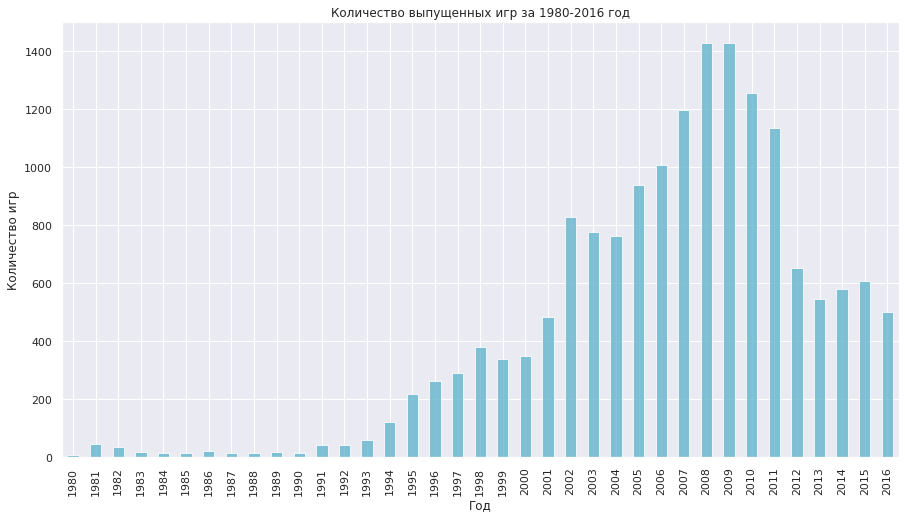

In [28]:
sns.set_theme()
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot.bar(
    figsize=(15, 8), legend=False, grid=True, alpha=0.8, color='c')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр за 1980-2016 год');

Видим, до 1994 года  игр выпускалось не так много, период с 1994 по 2008 года характеризуется нарастающим трендом выпускаемых игр, а в период с 2009 года началась тенденция на уменьшение количества выпускаемых игр, с 2012 года количество игр начало стабилизироваться. Для дальнейшего анализа период с 2012 года примем за актуальный. 

Определим топ-5 платформ с наибольшими продажами за всё время.

In [29]:
top_platforms = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False
    ).head(5)
top_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78


Построим распределение продаж по годам для топ-5 платформ. 

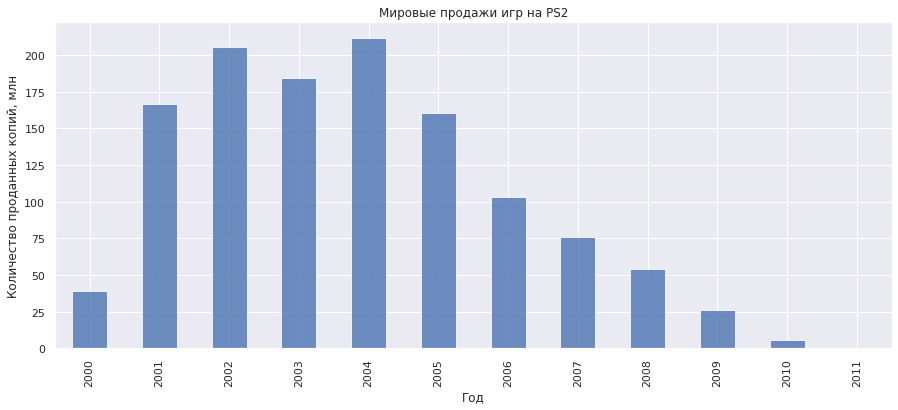

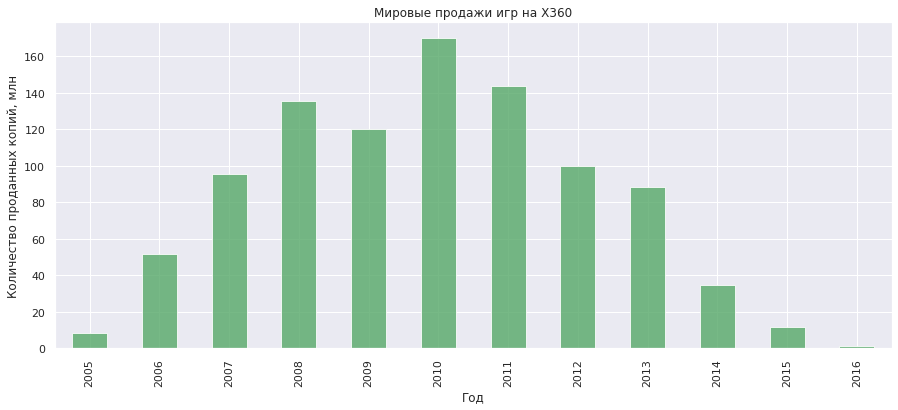

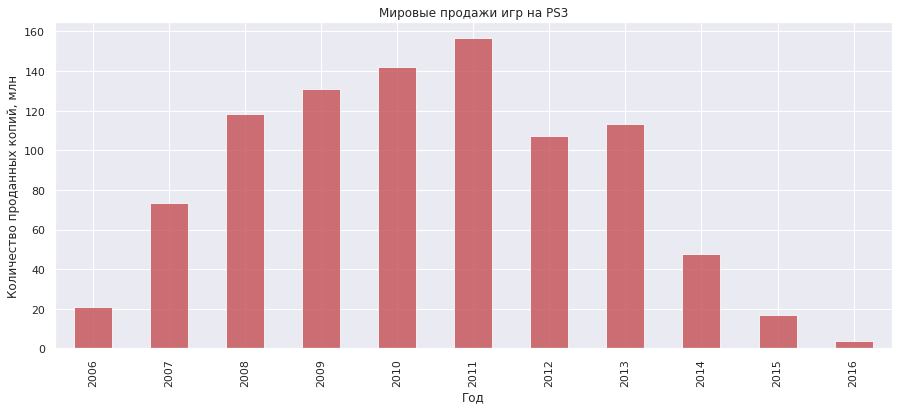

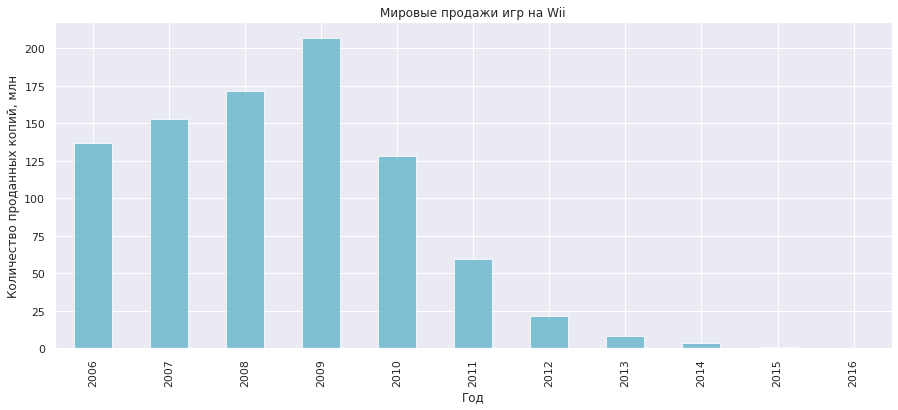

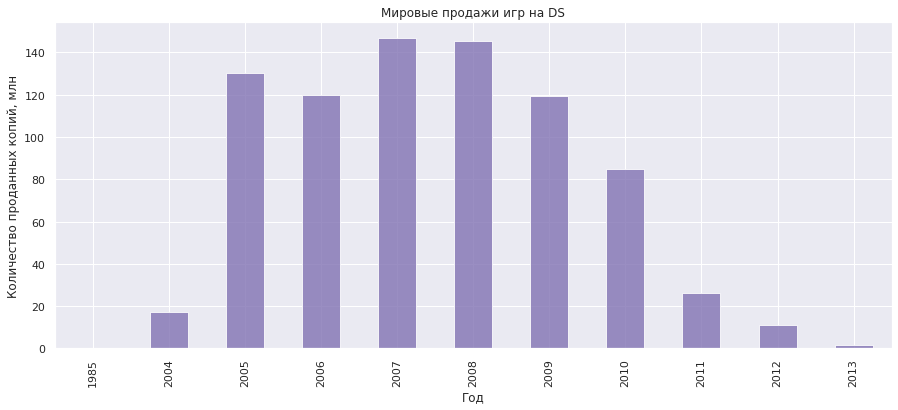

In [30]:
color = ['b', 'g', 'r', 'c', 'm']
k = 0
for i in top_platforms.index:
    df.query('platform == @i').pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').plot.bar(
    figsize=(15, 6), legend=False, color=color[k], alpha=0.8, xlabel='Год', ylabel='Количество проданных копий, млн')
    plt.title('Мировые продажи игр на ' + i)
    k += 1

В глаза бросается данные для Nintendo DS за 1985 год. Официально Nintendo DS вышла только в 2004 года. Рассмотрим подробнее.

In [31]:
df.query('(platform == "DS") & (year_of_release == 1985)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,no_ESRB,0.02


Игра Strongest Tokyo University Shogi DS, по данным из интернета, является неким симулятором японский шахмат, по всей видимости, разрабатываемым в Токийском университете в 1985 году. К платформе Nintendo DS данная игра не имеет никакого отношения, поэтому удалим ее из нашего датасета, а также обновим индексы.

In [32]:
df = df.drop(index=15957).reset_index(drop=True)

Заново построим распределение продаж по годам для платформы DS.

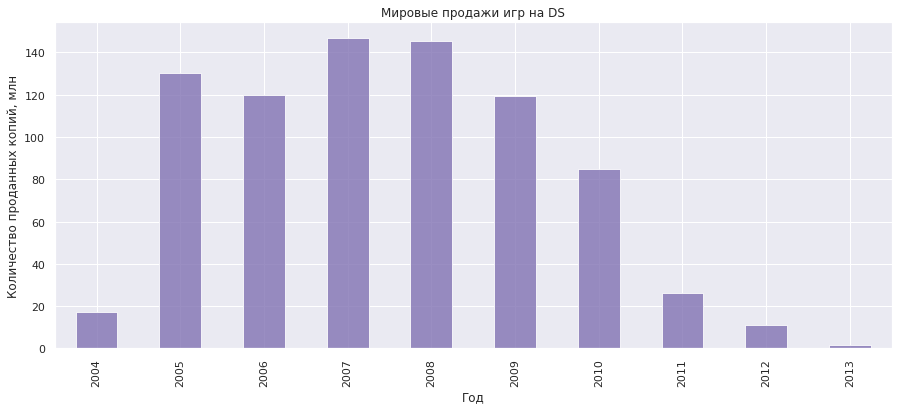

In [33]:
df.query('platform == "DS"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum').plot.bar(
    figsize=(15, 6), legend=False, color='m', alpha=0.8, xlabel='Год', ylabel='Количество проданных копий, млн')
plt.title('Мировые продажи игр на DS');

В получившемся столбце с периодом жизни платформ есть некоторые выбивающиеся значения, например для ПК, поэтому воспользуемся медианой для определения среднего срока жизни платформ.

In [36]:
platform_timeline['Период "жизни" платформы, лет'].median()

7.0

Таким образом, характерный срок появления новых и устаревания старых платформ - 7 лет.

За актуальный период возьмем данные с 2012 года, включительно. Запишем их в переменную *rel_df*.

In [37]:
rel_df = df.query('year_of_release >= 2012')
rel_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,no_ESRB,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,no_ESRB,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16430,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,no_ESRB,0.01
16434,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,no_ESRB,0.01
16437,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,no_ESRB,0.01
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,no_ESRB,0.01


##### Изучение продаж игр по платформам

Построим общий график с наглядной динамикой продаж игр для всех платформ в нашем датасете с 2009 года.

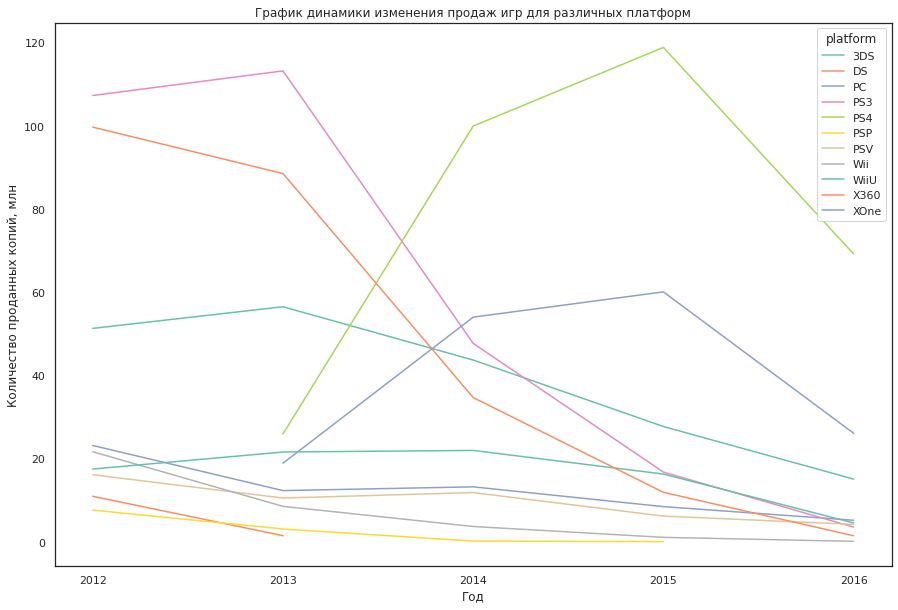

In [38]:
sns.set_theme(style='white', palette='Set2')
rel_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    figsize=(15,10), xticks=(range(2012, 2017)))
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн')
plt.title('График динамики изменения продаж игр для различных платформ');

На момент 2016 года по прадажам в мире лидирует PlayStation 4, далее идет Xbox One и Nintendo 3DS, при этом практически все платформы показывают меньшие продажи, чем в 2015 году. Это может быть связано с тем, что наш датасет был составлен, когда 2016 год еще не закончился, и это неполные показатели. Для чистоты нашего исследования перспективных платформ возьмем данные до 2015 года, включительно.

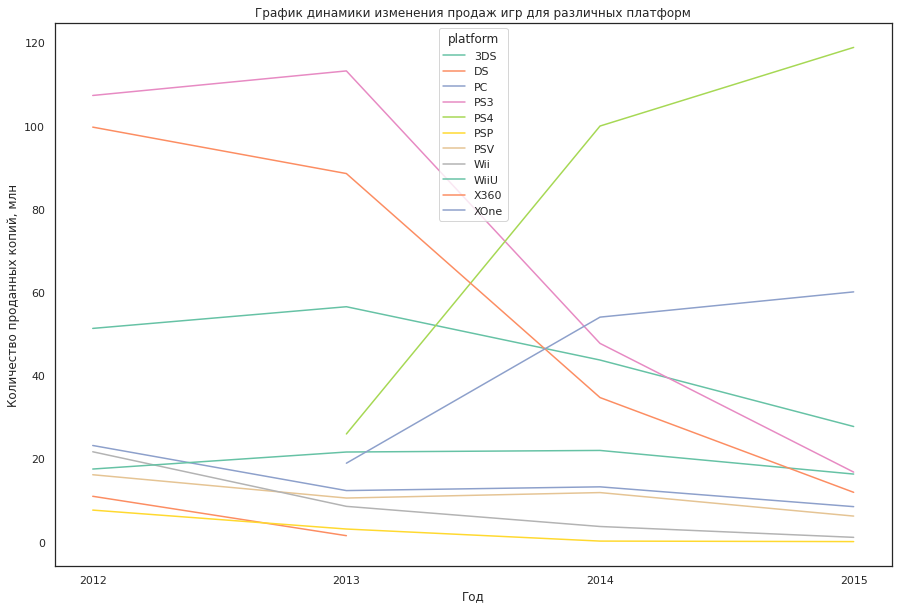

In [39]:
rel_df.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')[:-1].plot(
    figsize=(15,10), xticks=(range(2012, 2016)))
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн')
plt.title('График динамики изменения продаж игр для различных платформ');

По графику видим, что лидеры по продажам не изменились. В растущим платформам можем отнести PlayStation 4, Xbox One. У остальных платформ наметился тренд на снижение продаж. Потенциально прибыльными платформами будем считать PlayStation 4 и Xbox One.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам с отбражением выбросов и без.

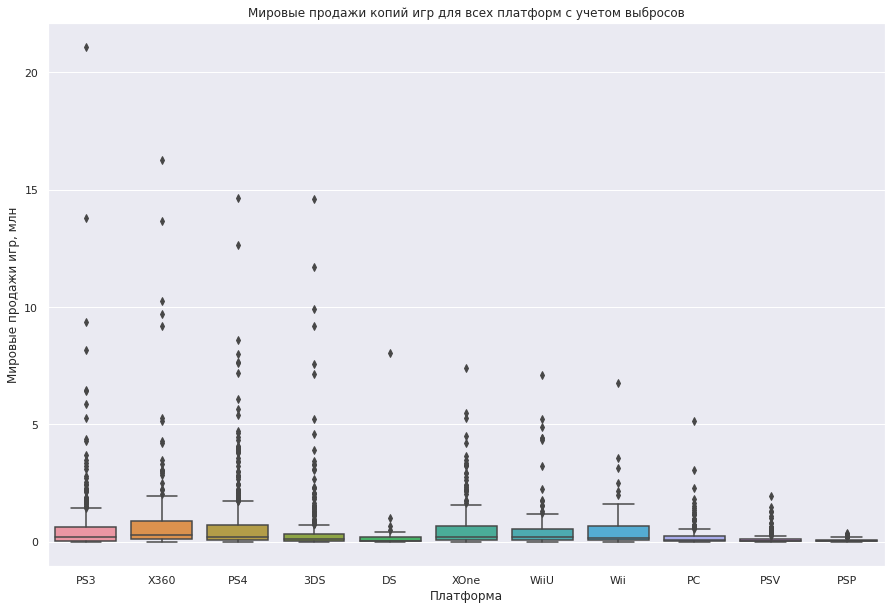

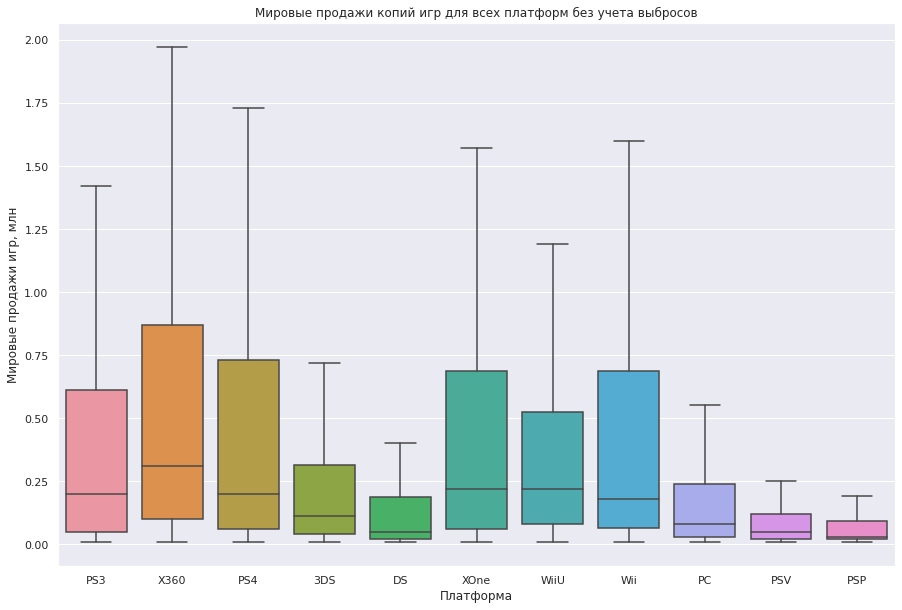

In [40]:
sns.set_theme()
plt.figure(figsize=(15,10))
sns.boxplot(data=rel_df, x='platform', y='total_sales')
plt.xlabel('Платформа')
plt.ylabel('Мировые продажи игр, млн')
plt.title('Мировые продажи копий игр для всех платформ с учетом выбросов');

plt.figure(figsize=(15,10))
sns.boxplot(data=rel_df, x='platform', y='total_sales', showfliers=False)
plt.xlabel('Платформа')
plt.ylabel('Мировые продажи игр, млн')
plt.title('Мировые продажи копий игр для всех платформ без учета выбросов');

##### Изучение влияния оценок критиков и пользователей на продажи для самых продаваемых платформ для игр

Рассмотрим корреляцию между продажами и отзывами пользователей и критиков сразу для 5 популярных платформ. Для этого, сначала, определим эти самые топ-5 платформ по продажам за актуальный период.

In [41]:
top_rel_df = rel_df.rename(columns={'platform': 'Платформа', 'total_sales': 'Мировые продажи, млн'}).pivot_table(
    index='Платформа', values='Мировые продажи, млн', aggfunc='sum').sort_values(
    by='Мировые продажи, млн', ascending=False
    ).head(5)
top_rel_df

,"Мировые продажи, млн"
Платформа,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32


В топ-5 по продажам находится PS4, PS3, Xbox 360, Nintendo 3DS и Xbox One. Построим диаграмму рассеяния для этих платформ.

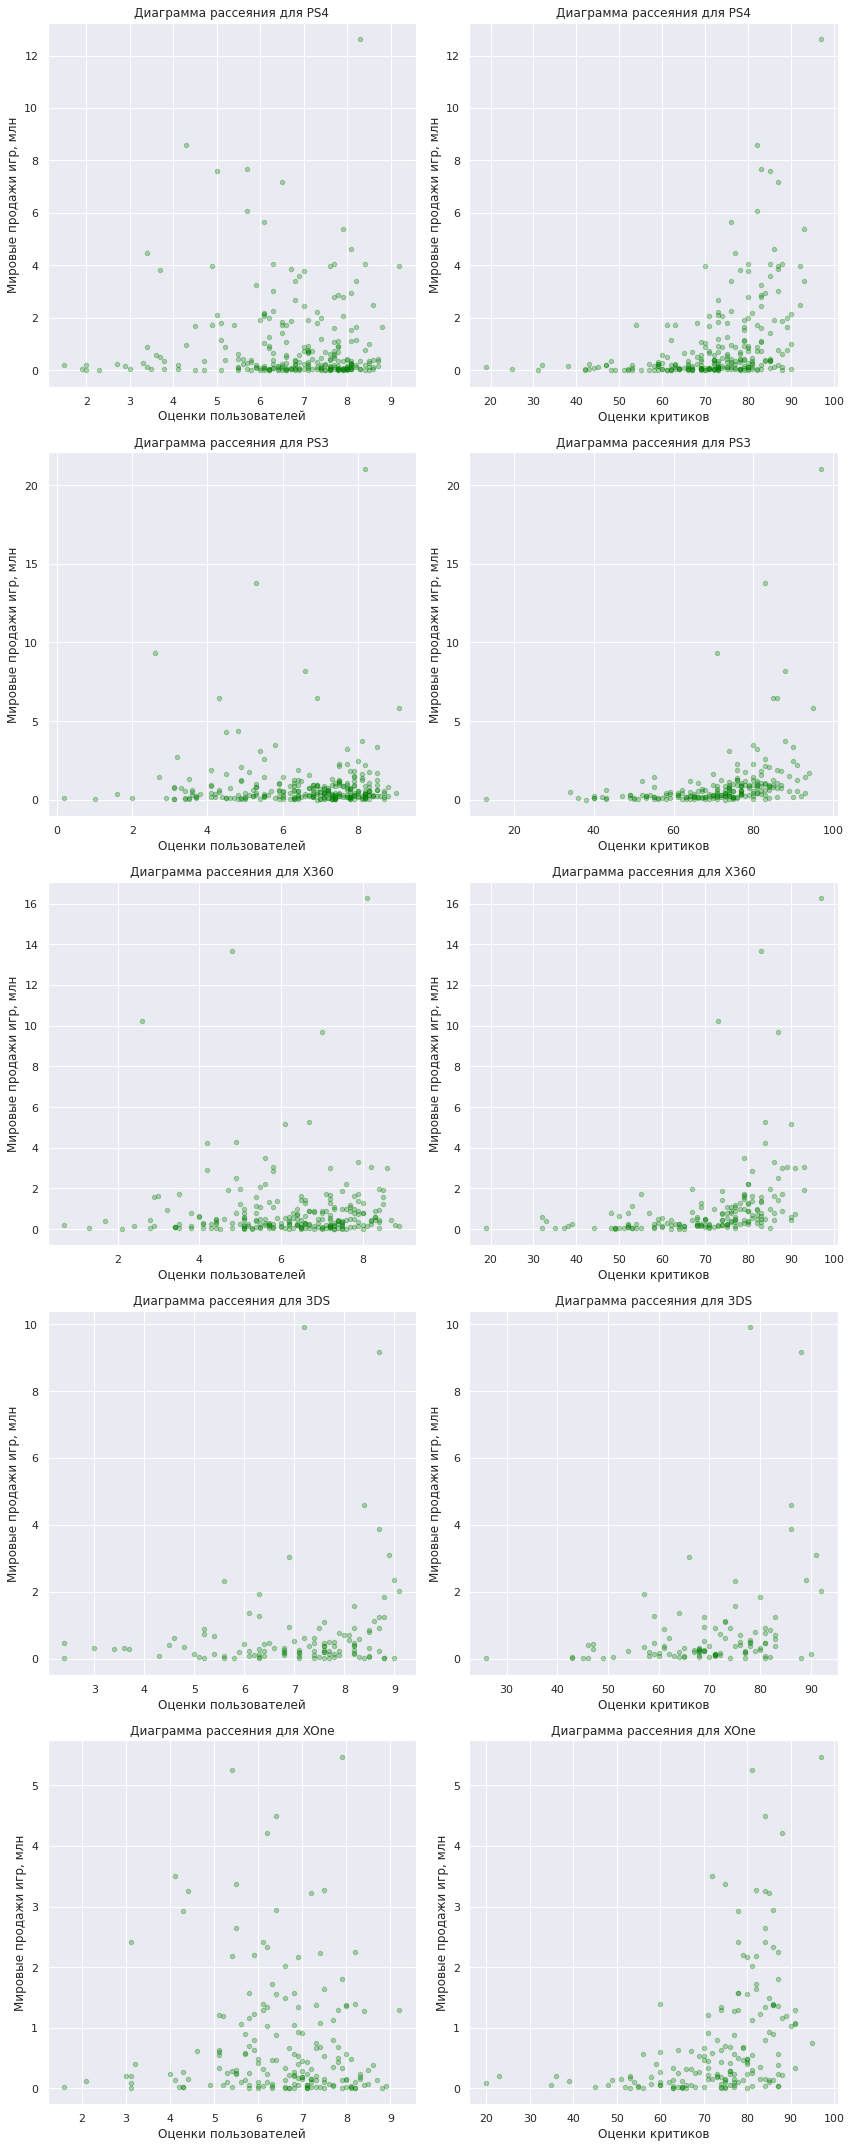

In [42]:
# Делаем вывод графиков корреляции для каждой платформы из топ-5 за текущий период
fig, axes = plt.subplots(5, 2)
row = 0
for i in top_rel_df.index:
    column = 0
    for j in ['Оценки пользователей', 'Оценки критиков']:
        rel_df.query('platform == @i').rename(columns=
    {'total_sales': 'Мировые продажи игр, млн', 
     'user_score': 'Оценки пользователей', 
     'critic_score': 'Оценки критиков'}
        ).plot.scatter(
            x=j, y='Мировые продажи игр, млн', 
            c='green', ax=axes[row, column], figsize=(12, 30), title=f'Диаграмма рассеяния для {i}', alpha=.3
        )
        column += 1
    row += 1
fig.tight_layout()

По графикам видим, что основные скопления точек находятся ближе к осям, что говорит о слабом характере взаимосвязи между параметрами.

Также создадим сводную таблицу с численными значениями корреляции Пирсона между параметрами.

In [43]:
rel_df.rename(columns=
    {'platform': 'Платформа', 
     'user_score': 'Оценки пользователей', 
     'critic_score': 'Оценки критиков', 
     'total_sales': 'Мировые продажи, млн'}
      ).pivot_table(index='Платформа', values=[
    'Оценки пользователей', 'Оценки критиков', 'Мировые продажи, млн'
    ], aggfunc='corr').loc[top_rel_df.index].round(2)

Мировые продажи, млн  Оценки критиков  \
Платформа                                                               
PS4       Оценки пользователей                 -0.03             0.56   
          Оценки критиков                       0.41             1.00   
          Мировые продажи, млн                  1.00             0.41   
PS3       Оценки пользователей                 -0.01             0.54   
          Оценки критиков                       0.33             1.00   
          Мировые продажи, млн                  1.00             0.33   
X360      Оценки пользователей                  0.01             0.56   
          Оценки критиков                       0.36             1.00   
          Мировые продажи, млн                  1.00             0.36   
3DS       Оценки пользователей                  0.20             0.72   
          Оценки критиков                       0.32             1.00   
          Мировые продажи, млн                  1.00             0.32   
XOne      Оценки пользователей                 -0.07             0.47   
          Оценки критиков                       0.42             1.00   
          Мировые продажи, млн                  1.00             0.42   

                                Оценки пользователей  
Платформа                                             
PS4       Оценки пользователей                  1.00  
          Оценки критиков                       0.56  
          Мировые продажи, млн                 -0.03  
PS3       Оценки пользователей                  1.00  
          Оценки критиков                       0.54  
          Мировые продажи, млн                 -0.01  
X360      Оценки пользователей                  1.00  
          Оценки критиков                       0.56  
          Мировые продажи, млн                  0.01  
3DS       Оценки пользователей                  1.00  
          Оценки критиков                       0.72  
          Мировые продажи, млн                  0.20  
XOne      Оценки пользователей                  1.00  
          Оценки критиков                       0.47  
          Мировые продажи, млн                 -0.07

По таблице можно сделать вывод о том, что характер взаимосвязи между мировыми продажами и отзывами критиков для всех платформ - слабый, находится в диапазоне от 0,3 до 0,5. Значения коэффициента корреляции Пирсона между мировыми продажами и оценками пользователей для всех платформ - очень слабая. Наиболее зависимая платформа от отзывов критиков - Xbox One (корреляция Пирсона - 0,42), а от отзывов пользователей - Nintendo 3DS.

Составим сводную таблицу с количеством игр в каждом жанре и их мировыми продажами.

In [44]:
top_genres = rel_df.rename(columns={'genre': 'Жанр'}).pivot_table(
    index='Жанр', values='total_sales', aggfunc=('count', 'sum')).rename(
    columns={'count': 'Количество игр','sum': 'Мировые продажи игр, млн'}).sort_values(
    by='Мировые продажи игр, млн', ascending=False)
top_genres

,Количество игр,"Мировые продажи игр, млн"
Жанр,,
Action,1031,441.12
Shooter,235,304.73
Role-Playing,370,192.80
Sports,267,181.06
Misc,192,85.04
Platform,85,61.00
Racing,115,53.50
Fighting,109,44.49
Simulation,80,35.12


Самыми продаваемыми жанрами в мире являются жанр **Action** (441,12 млн. копий), **Shooter** (304,73 млн. копий) и **Role-Playing** (192,8 млн копий). 

Так как количство игр отличается в каждом жанре, сравнивать продажи некорректно, добавим в таблицу *top_genres* продажи, приходящиеся на каждую игру, в среднем.

In [45]:
top_genres['Среднее число проданных копий'] = (
    top_genres['Мировые продажи игр, млн'] / top_genres['Количество игр']).round(2)
top_genres.sort_values(
    by='Среднее число проданных копий', ascending=False, inplace=True)
top_genres

,Количество игр,"Мировые продажи игр, млн",Среднее число проданных копий
Жанр,,,
Shooter,235,304.73,1.30
Platform,85,61.00,0.72
Sports,267,181.06,0.68
Role-Playing,370,192.80,0.52
Racing,115,53.50,0.47
Misc,192,85.04,0.44
Simulation,80,35.12,0.44
Action,1031,441.12,0.43
Fighting,109,44.49,0.41


Тут уже ситуация становится немного другой, т.к, в среднем, самые большие продажи у игр в жанре **Shooter** (1,3 млн. копий на одну игру), **Platform** (720 тыс. копий на 1 игру) и **Sports** (680 тыс. копий на 1 игру).

Также оценим мировые продажи игр каждого жанра с помощью ящика с усами без показа выбросов. 

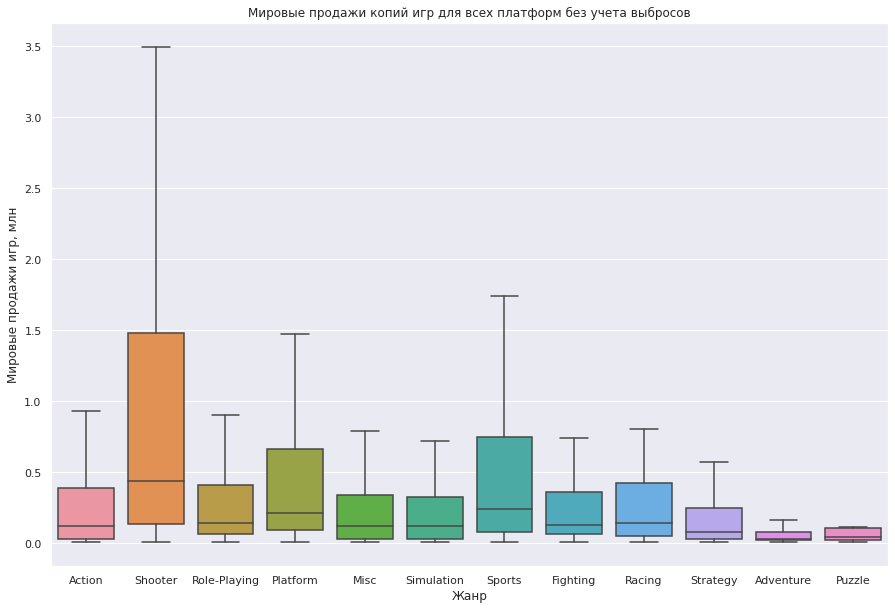

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(data=rel_df, x='genre', y='total_sales', showfliers=False)
plt.xlabel('Жанр')
plt.ylabel('Мировые продажи игр, млн')
plt.title('Мировые продажи копий игр для всех платформ без учета выбросов');

По графику видим, что жанр **Shooter** имеет самую большую медиану и 3 квартиль (около 1,5 млн. копий), остальные жанры значительно уступают. Далее располагаются жанры **Platform** и **Sports**, что подтверждает наш вывод из сводной таблицы.

**Вывод:** Таким образом, в результате исследовательского анализа данных были выполнены следующие действия:
- За актуальный период был принят период с 2012 года, включительно, как период, характеризующийся стабилизацией общего числа выпускаемых видеоигр;
- Потенциально прибыльными платформами были приняты PlayStation 4 и Xbox One, как лидеры по продажам и платформы с нарастающим трендом динамики продаж;
- Игры на Xbox 360 имеют самую высокую медиану количества проданных копий, далее идет PlayStation 4 и Xbox One.
- Были постороены диаграммы рассеяния для топ-5 платформ по продажам по всему миру для определения взаимосвязи между продажами и оценками пользователей и критиков, и было выяснено, что взаимосвязь явлется слабой;
- Для подтверждения этого были найдены численные значения корреляции Пирсона, которые показали, что взаимосвязь между продажами игр и оценками критиков является слабой, а между продажами и оценками пользователей - очень слабой;
- Были найдены средние значения количества проданных копий, приходящиеся на одну игру, и определено, что лидерами по этому показателю является жанр *Shooter*, далее располагается жанр *Platform* и *Sports*.
- Был построен ящик с усами с данными о продажах в разных жанрах и он подтвердил выводы, полученные в предыдущем пункте.

#### Составление портрета пользователя для каждого региона

##### Самые популярные платформы по регионам

Для составления портрета пользователя в каждом регионе построим круговую диаграмму по каждому из регионов (Северная Америка, Европа и Япония) с информацией о пяти самых популярных платформах по продажам. Для наглядности объединим платформы и жанры, не попавшие в топ-5 в отдельную переменную *Others*. Для этого зададим функцию.

In [47]:
#функция принимает датасет, признак, которому мы выстраиваем топ-5 и количественная переменная, в нашем исследовании это продажи
def others(df, feat, var):
    pivot_tab = df.pivot_table(index=feat, values=var, aggfunc='sum').sort_values(by=var, ascending=False).reset_index()
    temp_df = pivot_tab.copy()
    temp_df = temp_df.loc[:4,]
    temp_df = temp_df.append(pivot_tab.loc[5:, [var]].sum(), ignore_index=True)
    temp_df.loc[5, feat] = 'Others'
    return temp_df

In [48]:
eu_platform = others(rel_df, 'platform', 'eu_sales')
na_platform = others(rel_df, 'platform', 'na_sales')
jp_platform = others(rel_df, 'platform', 'jp_sales')

Далее визуализируем полученные результаты.

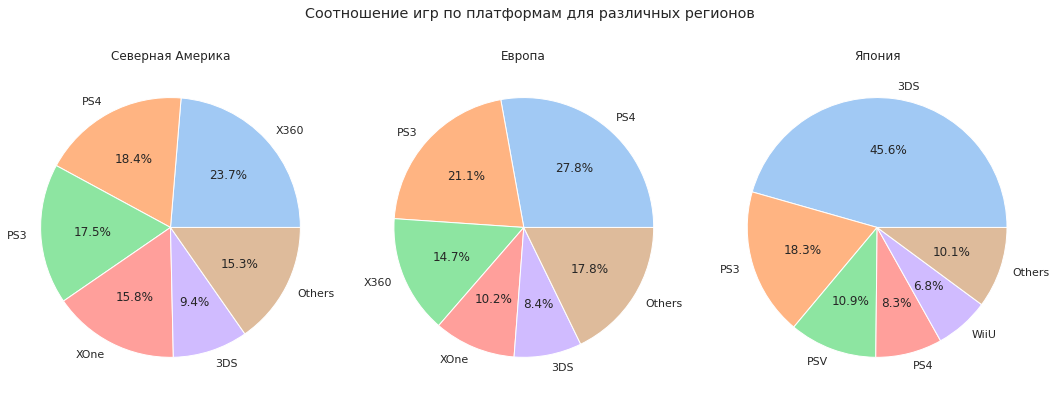

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Соотношение игр по платформам для различных регионов')
palette_color = sns.color_palette('pastel')

ax[0].pie(na_platform['na_sales'], labels=na_platform['platform'], autopct='%.1f%%', colors=palette_color)
ax[0].set_title('Северная Америка')

ax[1].pie(eu_platform['eu_sales'], labels=eu_platform['platform'], autopct='%.1f%%', colors=palette_color)
ax[1].set_title('Европа')

ax[2].pie(jp_platform['jp_sales'], labels=jp_platform['platform'], autopct='%.1f%%', colors=palette_color)
ax[2].set_title('Япония')

fig.tight_layout()
plt.show()

По графикам можем заметить, что первые места во всех регионах различаются. В Северной Америке большинство людей отдают предпочтение Xbox 360, в Европе - PS4, а в Японии - Nintendo 3DS. При этом PlayStation 3 также в топ-3 в Северной Америке и Японии. 

##### Самые популярные жанры по регионам

Проделаем аналогичные действия для определения самых популярных жанров в регионах.

In [50]:
eu_genre = others(rel_df, 'genre', 'eu_sales')
na_genre = others(rel_df, 'genre', 'na_sales')
jp_genre = others(rel_df, 'genre', 'jp_sales')

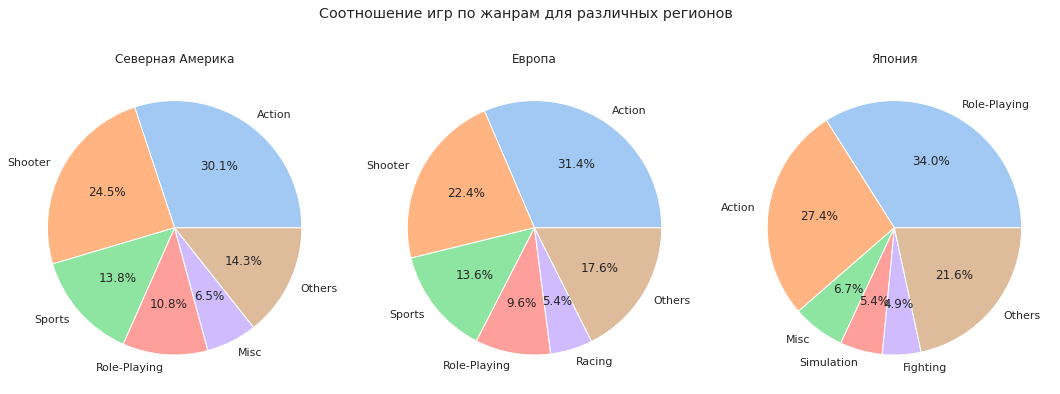

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Соотношение игр по жанрам для различных регионов')
palette_color = sns.color_palette('pastel')

ax[0].pie(na_genre['na_sales'], labels=na_genre['genre'], autopct='%.1f%%', colors=palette_color)
ax[0].set_title('Северная Америка')

ax[1].pie(eu_genre['eu_sales'], labels=eu_genre['genre'], autopct='%.1f%%', colors=palette_color)
ax[1].set_title('Европа')

ax[2].pie(jp_genre['jp_sales'], labels=jp_genre['genre'], autopct='%.1f%%', colors=palette_color)
ax[2].set_title('Япония')

fig.tight_layout()
plt.show()

Видим, что самые популярные жанры в Северной Америке и Европе совпадают - это Action, Shooter и Sports, для Японии же самый продаваемый жанр - это Role-Playing, Action находится на 2 месте, далее следует жанр Misc.

##### Влияние рейтинга ESRB на продажи игр в различных регионах

Для определения влияния рейтинга ESRB на продажи составим график с наглядным распределением продаж игр с различным рейтингом.

In [52]:
na_rating = rel_df.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').reset_index()
eu_rating = rel_df.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').reset_index()
jp_rating = rel_df.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').reset_index()

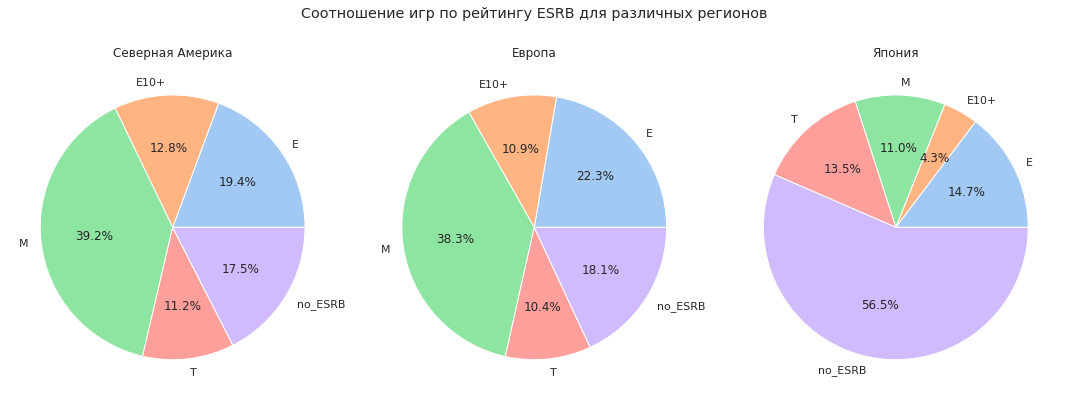

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Соотношение игр по рейтингу ESRB для различных регионов')
palette_color = sns.color_palette('pastel')

ax[0].pie(na_rating['na_sales'], labels=na_rating['rating'], autopct='%.1f%%', colors=palette_color)
ax[0].set_title('Северная Америка')

ax[1].pie(eu_rating['eu_sales'], labels=eu_rating['rating'], autopct='%.1f%%', colors=palette_color)
ax[1].set_title('Европа')

ax[2].pie(jp_rating['jp_sales'], labels=jp_rating['rating'], autopct='%.1f%%', colors=palette_color)
ax[2].set_title('Япония')

fig.tight_layout()
plt.show()

По круговым диаграммам для различных регионов видим, что в Европе и в Северной Америке на первом месте по продажам находятся игры с рейтингом **M** (Mature — Для взрослых), далее игры с рейтингом **E** (Everyone - Для всех) и игры без ESRB рейтинга. В Японии ситуация другая, на первом месте по продажам игры без ESRB рейтинга, далее идёт **E** и только потом игры с рейтингом **T** (Teen - для подростков). Данную ситуацию в Японии можно объяснить тем, что ESRB рейтинг предназначен для маркировки игр рынка США и Канады, и многие игры в Японии могут его не иметь. 

**Вывод:** 

Таким образом, типичный портрет пользователя из Северной Америки имеет следующее описание: он играет в Xbox 360 в Шутер или Экшн с рейтингом только для взрослых или для всех.

Для Европы это описание будет таким: пользователь играет в PlayStation 4 в Шутер или Экшн с рейтингом только для взрослых или для всех.

Для Японии: пользователь играет в Nintendo 3DS в игру в жанре Role-Playing без ESRB рейтинга.

#### Статистический анализ данных

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки гипотезы будем использовать двухвыборочный t-test, т.к. выборки независимы.

Гипотезы:

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Уровень значимости установим 5%.

In [55]:
#создадим две выборки для игр на Xbox One и PC без пропусков
xbox_data = rel_df.query('platform == "XOne"')['user_score'].dropna()
pc_data = rel_df.query('platform == "PC"')['user_score'].dropna()

#протестируем эти две выборки с помощью t-test'а
alpha = .05
results = st.ttest_ind(xbox_data, pc_data)
print(f'p-value равно {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value равно 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC равны не была отвергнута, поэтому мы её принимаем. 

##### Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотезы будем использовать двухвыборочный t-test, т.к. выборки независимы.

Гипотезы:

H0: Средние пользовательские рейтинги жанров Action и Sports равны.

H1: Средние пользовательские рейтинги жанров Action и Sports не равны.

Уровень значимости установим 5%.

In [56]:
#создадим две выборки для Action игр и Sports игр без пропусков
action_data = rel_df.query('genre == "Action"')['user_score'].dropna()
sports_data = rel_df.query('genre == "Sports"')['user_score'].dropna()

#протестируем эти две выборки с помощью t-test'а
alpha = .05
results = st.ttest_ind(action_data, sports_data)
print(f'p-value равно {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value равно 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Гипотеза, что средние пользовательские рейтинги жанров Action и Sports равны была отвергнута в пользу альтернативной, т.е мы принимаем гипотезу, что средние пользовательские рейтинги жанров Action и Sports не равны.

In [57]:
print(f'Средний пользовательский рейтинг жанра Action: {rel_df[rel_df["genre"] == "Action"]["user_score"].mean():.2f}')
print(f'Средний пользовательский рейтинг жанра Sports: {rel_df[rel_df["genre"] == "Sports"]["user_score"].mean():.2f}')

Средний пользовательский рейтинг жанра Action: 6.83
Средний пользовательский рейтинг жанра Sports: 5.46


**Вывод:** Таким образом, были проверены две гипотезы и сделаны выводы, что:
- Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC равны не была отвергнута, поэтому мы её приняли.
- Гипотеза, что средние пользовательские рейтинги жанров Action и Sports равны была отвергнута в пользу альтернативной, т.е мы приняли гипотезу, что средние пользовательские рейтинги жанров Action и Sports не равны.

#### Вывод

В ходе выполнения исследования данных о продажах компьютерных игр были достигнуты следующие результаты:

1) В ходе предобработки данных было достигнуто:
- Названия столбцов приведены к нижнему регистру;
- Столбцы `year_of_release` и `critic_score` приведены к целочисленному типу данных;
- Столбец `user_score` приведен к типу с плавающей точкой;
- Удалены 2 строки с пропущенными названиями игры и жанром;
- Удалены 269 строк c пропусками в столбце `year_of_release`;
- Пропуски в столбце `rating` были заполнены значениями-индикаторами no_ESRB;
- Удалена одна строка-дубликат по параметрам названия, платформы и года выпуска;
- Добавлен столбец `total_sales` с информацией о суммарных продажах игр.

2) В результате исследовательского анализа данных были выполнены следующие действия:
- За актуальный период был принят период с 2012 года, включительно, как период, характеризующийся стабилизацией общего числа выпускаемых видеоигр;
- Потенциально прибыльными платформами были приняты PlayStation 4 и Xbox One, как лидеры по продажам и платформы с нарастающим трендом динамики продаж;
- Игры на Xbox 360 имеют самую высокую медиану количества проданных копий, далее идет PlayStation 4 и Xbox One.
- Были постороены диаграммы рассеяния для топ-5 платформ по продажам по всему миру для определения взаимосвязи между продажами и оценками пользователей и критиков, и было выяснено, что взаимосвязь явлется слабой;
- Для подтверждения этого были найдены численные значения корреляции Пирсона, которые показали, что взаимосвязь между продажами игр и оценками критиков является слабой, а между продажами и оценками пользователей - очень слабой;
- Были найдены средние значения количества проданных копий, приходящиеся на одну игру, и определено, что лидерами по этому показателю является жанр *Shooter*, далее располагается жанр *Platform* и *Sports*.
- Был построен ящик с усами с данными о продажах в разных жанрах и он подтвердил выводы, полученные в предыдущем пункте.

3) Был составлен типичный портрет пользователя в Северной Америке, Европе и Японии.  
- Для Северной Америки: пользователь, играющий в Xbox 360 в Шутер или Экшн с рейтингом только для взрослых или для всех.

- Для Европы: пользователь, играющий в PlayStation 4 в Шутер или Экшн с рейтингом только для взрослых или для всех.

- Для Японии: пользователь, играющий в Nintendo 3DS в игру в жанре Role-Playing без рейтинга ESRB.

4) Были проверены две гипотезы и сделаны выводы, что:

 - Средние пользовательские рейтинги платформ Xbox One и PC равны.
 - Средние пользовательские рейтинги жанров Action и Sports не равны.
 
Подводя итог всего исследования, можно сделать вывод, что рекламный бюджет необходимо направить на игры потенциально самые прибыльные платформы: это Xbox One или PS4. Для европейского и американских рынков лучшим решением для рекламы будут шутеры, экшны и спортивные игры с рейтингом для взрослых. Для японского рынка реклама больше всего даст, если продвигать игры в жанре Role-Playing или экшн без ESRB рейтинга. При этом отзывы критиков и пользователей можно оставить без внимания, так как зависимость между продажами и оценками - слабая.